In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime
from config import weather_api_key
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude compbinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

87.60736901983665 26.325333550121627
-25.639070513593566 81.44622257344724
75.74153806441132 81.50327227539617
48.77107053966802 6.200102483509795
15.795771788646846 -109.7931770967753
-76.37008322692691 -161.75531447082088
-38.66850150954134 173.88628982733235
68.56415308484807 145.71675970789005
-24.689679837791175 -3.0629289288440305
-57.36479459333811 -95.79016474364093
1.1976962009518815 159.46937168973182
-57.510652750990005 -154.0002815604218
-71.22097578195226 47.97377671232147
-12.044123424981535 -85.16178320802754
-86.41936849891121 130.53062183318679
-79.72194544120231 -142.87902903313392
-42.56994534422536 162.31031207961126
5.044588968401399 -106.06582763256537
-1.554676434206172 -79.32318007979934
84.4866685924708 -28.97207770773207
31.749440622333523 -59.360093372998165
-38.15657486175053 -99.54280444096548
3.177303372053345 -10.738472001250756
-1.6791810681858692 -129.82348492100996
-87.54252856665043 27.072263297335354
-75.26636186148785 133.0216628483617
-52.375023997

7.84809132795516 -68.08154682225276
-50.31138430573138 167.60951356742856
12.836861887709603 -71.60387204870023
-73.77985444488937 -83.50649623921214
34.2206710853895 47.41736858487306
-57.58072686255261 -81.14356247181433
-18.42058800548871 -80.65176916429225
-15.820221398758164 119.8008302401364
60.32544451622533 124.21042964342809
-20.810267611477002 131.1984983407923
-46.359696965661236 -23.923940234137234
49.48241710659269 0.7476669216348455
5.556914923817672 -159.08190009827743
68.92785314362482 25.547343148487357
-37.278803985661234 49.5514050327003
-62.355405386761625 98.04981885708548
-82.0899380562917 53.31700904441442
-56.384290847872286 98.13560658766875
-38.820953150258305 19.472460120454514
25.715961008020344 73.5402072830181
88.13410208103252 62.55800952019578
-73.18003500083869 -148.43190731909016
42.834606916384445 147.01762430818485
30.73593472014754 110.24708480630562
70.03872211286819 175.60871796218646
44.88985377216258 -122.19453887588227
-26.96937607930714 24.503

In [6]:
# Use the print() function to display the latitude and longitude combinations.

# Create a for loop that will iterate through the coordinates' unzipped tuple
for coordinate in coordinates:
    
    # Use citipy.nearest_city() and inside the parentheses of nearest_city(), add the latitude and longitude in this format: 
    # coordinate[0], coordinate[1]
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name,citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

longyearbyen sj
grand river south east mu
dikson ru
saint-max fr
san patricio mx
mataura pf
new plymouth nz
belaya gora ru
jamestown sh
punta arenas cl
kieta pg
mataura pf
port alfred za
chicama pe
new norfolk au
mataura pf
te anau nz
acapulco mx
catarama ec
illoqqortoormiut gl
saint george bm
lebu cl
buchanan lr
atuona pf
bredasdorp za
new norfolk au
rikitea pf
jamestown sh
dikson ru
busselton au
rikitea pf
barrow us
hay river ca
kavieng pg
qaanaaq gl
yaan cn
ruatoria nz
puerto ayora ec
puerto ayora ec
grindavik is
dikson ru
pevek ru
mataura pf
castro cl
busselton au
adelaide za
hanumangarh in
pevek ru
illoqqortoormiut gl
rikitea pf
ushuaia ar
vila franca do campo pt
hilo us
ivanivka ua
gambela et
touros br
kautokeino no
khatanga ru
buchanan lr
chokurdakh ru
qaanaaq gl
rikitea pf
chokurdakh ru
airai pw
cape town za
busselton au
kaitangata nz
tiksi ru
cape town za
fevik no
chitungwiza zw
rikitea pf
vaini to
illoqqortoormiut gl
georgetown sh
lagoa pt
pevek ru
barentsburg sj
mataura pf
p

busselton au
hobart au
illoqqortoormiut gl
leningradskiy ru
adre td
tiksi ru
tuktoyaktuk ca
chuy uy
rikitea pf
ponta do sol cv
westport nz
barrow us
chuy uy
saint-pierre pm
longyearbyen sj
victoria sc
rikitea pf
bengkulu id
broome au
mataura pf
saint-philippe re
new norfolk au
airai pw
punta arenas cl
albany au
qaanaaq gl
avarua ck
nome us
new norfolk au
magrath ca
niquero cu
mason city us
new norfolk au
mataura pf
yafran ly
punta arenas cl
port alfred za
codrington ag
gambo ca
tiksi ru
namatanai pg
albany au
ushuaia ar
fortuna us
port alfred za
tiksi ru
zhigansk ru
hithadhoo mv
rennes fr
lebu cl
avarua ck
fairbanks us
torbay ca
qasigiannguit gl
punta arenas cl
east london za
cape town za
sri aman my
saskylakh ru
birao cf
avarua ck
kurilsk ru
kutum sd
port macquarie au
puerto ayora ec
el faiyum eg
hobart au
atuona pf
saint-philippe re
ndende ga
bluff nz
lebu cl
norman wells ca
bethel us
pamfila gr
saskylakh ru
bandarbeyla so
hobart au
hermanus za
butaritari ki
albany au
bredasdorp za
p

hermanus za
port alfred za
punta arenas cl
arlit ne
mahebourg mu
castro cl
ye mm
shingu jp
bluff nz
mataura pf
dunedin nz
dikson ru
dudinka ru
khatanga ru
abiy adi et
hermanus za
touros br
rikitea pf
saint-philippe re
jamestown sh
albany au
hamilton bm
castro cl
carnarvon au
qaanaaq gl
anadyr ru
iqaluit ca
victoria sc
muravlenko ru
kamina cd
sistranda no
provideniya ru
carnarvon au
ongandjera na
hilo us
punta arenas cl
khatanga ru
tazmalt dz
butaritari ki
illoqqortoormiut gl
victoria sc
khatanga ru
narsaq gl
caravelas br
vaini to
albany au
zambezi zm
rikitea pf
thompson ca
mys shmidta ru
karaul ru
nikolskoye ru
camacupa ao
margate za
bredasdorp za
chimbote pe
palabuhanratu id
barrow us
cape town za
comodoro rivadavia ar
hermanus za
rikitea pf
bengkulu id
dikson ru
luderitz na
saskylakh ru
hasaki jp
coquimbo cl
thilogne sn
warqla dz
ilulissat gl
opuwo na
taolanaro mg
madang pg
ushuaia ar
vaitupu wf
albany au
jamestown sh
busselton au
hermanus za
chapais ca
praia da vitoria pt
amealco mx

In [8]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat==units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?lat==units=Imperial&APPID=19131dd6876f8d116d29f359b2890e84


In [9]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
# Iterate through the coordinates' unzipped tuple
for coordinate in coordinates:
    
    # Use citipy.nearest_city() and inside the parentheses of nearest_city(), add the latitude and longitude in this format: 
    # coordinate[0], coordinate[1] also set a variable "city"
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

562

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": (city_max_temp-273.15)*1.8+32,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | saint-max
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | new plymouth
Processing Record 8 of Set 1 | belaya gora
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | kieta
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | chicama
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | acapulco
Processing Record 17 of Set 1 | catarama
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | 

Processing Record 35 of Set 4 | faya
Processing Record 36 of Set 4 | fengrun
Processing Record 37 of Set 4 | bahia honda
Processing Record 38 of Set 4 | klaksvik
Processing Record 39 of Set 4 | xingyi
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | rincon
Processing Record 42 of Set 4 | sungaipenuh
Processing Record 43 of Set 4 | smithers
Processing Record 44 of Set 4 | sobolevo
Processing Record 45 of Set 4 | brekstad
Processing Record 46 of Set 4 | palmer
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | hamilton
Processing Record 50 of Set 4 | wanlaweyn
Processing Record 1 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | villa bruzual
Processing Record 4 of Set 5 | angren
Processing Record 5 of Set 5 | tieli
Processing Record 6 of Set 5 | saskylakh
Processing Record 7 of Set 5 | aykhal
Processing Reco

Processing Record 23 of Set 8 | titay
Processing Record 24 of Set 8 | turayf
Processing Record 25 of Set 8 | strezhevoy
Processing Record 26 of Set 8 | oranjemund
Processing Record 27 of Set 8 | halalo
City not found. Skipping...
Processing Record 28 of Set 8 | wakkanai
Processing Record 29 of Set 8 | sorvag
City not found. Skipping...
Processing Record 30 of Set 8 | nanortalik
Processing Record 31 of Set 8 | otacilio costa
Processing Record 32 of Set 8 | mar del plata
Processing Record 33 of Set 8 | port blair
Processing Record 34 of Set 8 | tonantins
Processing Record 35 of Set 8 | vokhma
Processing Record 36 of Set 8 | talcahuano
Processing Record 37 of Set 8 | hluti
Processing Record 38 of Set 8 | lilongwe
Processing Record 39 of Set 8 | sistranda
Processing Record 40 of Set 8 | kalmunai
Processing Record 41 of Set 8 | college
Processing Record 42 of Set 8 | karpathos
Processing Record 43 of Set 8 | le port
Processing Record 44 of Set 8 | kruisfontein
Processing Record 45 of Set 8 

Processing Record 8 of Set 12 | san policarpo
Processing Record 9 of Set 12 | jiazi
Processing Record 10 of Set 12 | port hardy
Processing Record 11 of Set 12 | saleaula
City not found. Skipping...
Processing Record 12 of Set 12 | port-gentil
-----------------------------
Data Retrieval Complete      
-----------------------------


In [29]:
len(city_data)

505

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,39.038,93,75,1.54,SJ,2022-09-29 23:07:00
1,Dikson,73.5069,80.5464,34.970,76,74,8.06,RU,2022-09-29 23:07:01
2,Saint-Max,48.7043,6.2100,45.104,93,0,0.00,FR,2022-09-29 23:07:01
3,San Patricio,28.0170,-97.5169,88.520,31,0,2.89,US,2022-09-29 23:07:02
4,Mataura,-46.1927,168.8643,48.470,47,48,1.05,NZ,2022-09-29 23:07:02
5,New Plymouth,-39.0667,174.0833,63.554,100,100,2.71,NZ,2022-09-29 23:07:03
6,Belaya Gora,68.5333,146.4167,25.844,73,57,2.49,RU,2022-09-29 23:07:03
7,Jamestown,42.0970,-79.2353,53.186,76,0,2.57,US,2022-09-29 23:04:53
8,Punta Arenas,-53.1500,-70.9167,44.114,70,37,5.64,CL,2022-09-29 23:02:54
9,Kieta,-6.2167,155.6333,85.208,57,21,2.21,PG,2022-09-29 23:07:05


In [31]:
# Change column order
new_column_order = ["City", "Country", "Date", "Lat", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Apply to dataframe
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2022-09-29 23:07:00,78.2186,39.038,93,75,1.54
1,Dikson,RU,2022-09-29 23:07:01,73.5069,34.970,76,74,8.06
2,Saint-Max,FR,2022-09-29 23:07:01,48.7043,45.104,93,0,0.00
3,San Patricio,US,2022-09-29 23:07:02,28.0170,88.520,31,0,2.89
4,Mataura,NZ,2022-09-29 23:07:02,-46.1927,48.470,47,48,1.05
5,New Plymouth,NZ,2022-09-29 23:07:03,-39.0667,63.554,100,100,2.71
6,Belaya Gora,RU,2022-09-29 23:07:03,68.5333,25.844,73,57,2.49
7,Jamestown,US,2022-09-29 23:04:53,42.0970,53.186,76,0,2.57
8,Punta Arenas,CL,2022-09-29 23:02:54,-53.1500,44.114,70,37,5.64
9,Kieta,PG,2022-09-29 23:07:05,-6.2167,85.208,57,21,2.21


In [32]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant data fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [34]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/30/22'

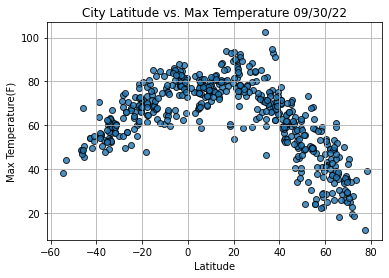

In [39]:
# Build the scatter polt for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

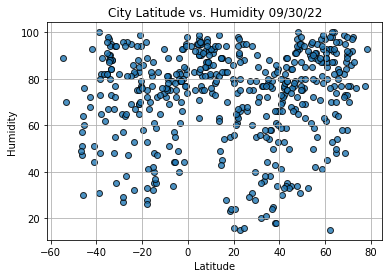

In [40]:
# Build the scatter polt for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

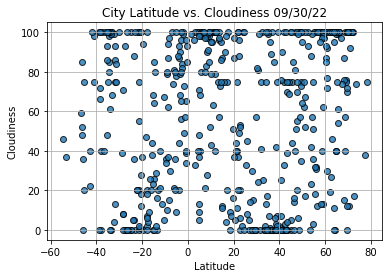

In [41]:
# Build the scatter polt for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

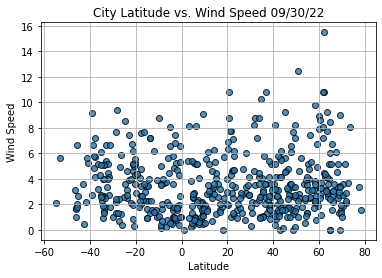

In [43]:
# Build the scatter polt for latitude vs. cloudiness.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()